<a href="https://colab.research.google.com/github/lailatulbadriyah24/2141720036-PCVK-2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kelompok 6**

Nama: Lailatul Badriyah

Kelas: TI-3H

NIM: 2141720036

Absen: 14


---



In [105]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Praktikum**

## **Contoh dengan Library**

### **Global Threshold**

In [106]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

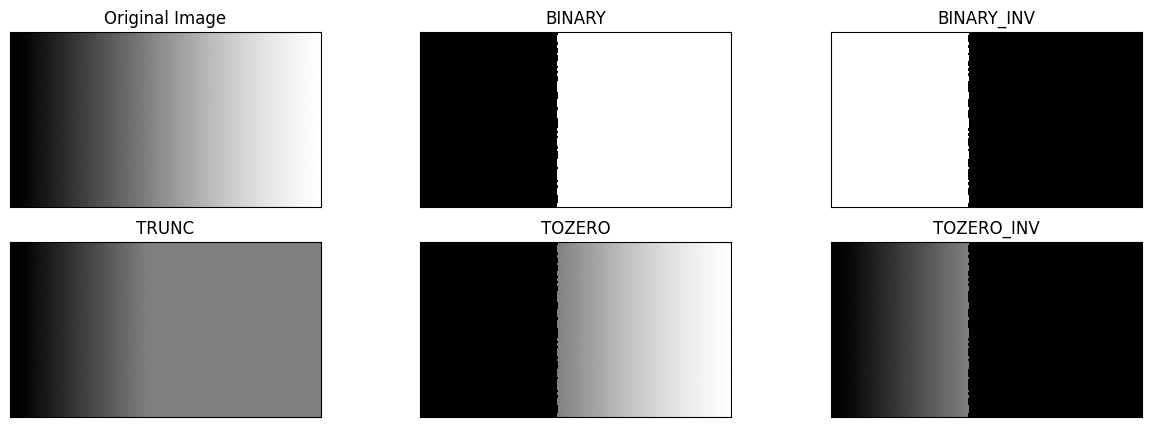

In [129]:
filename = ('/content/drive/MyDrive/PCVK/week10/image_thres/gradient.jpg')
img = cv.imread(filename)
thresh = 127      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

### **Adaptive Threshold**

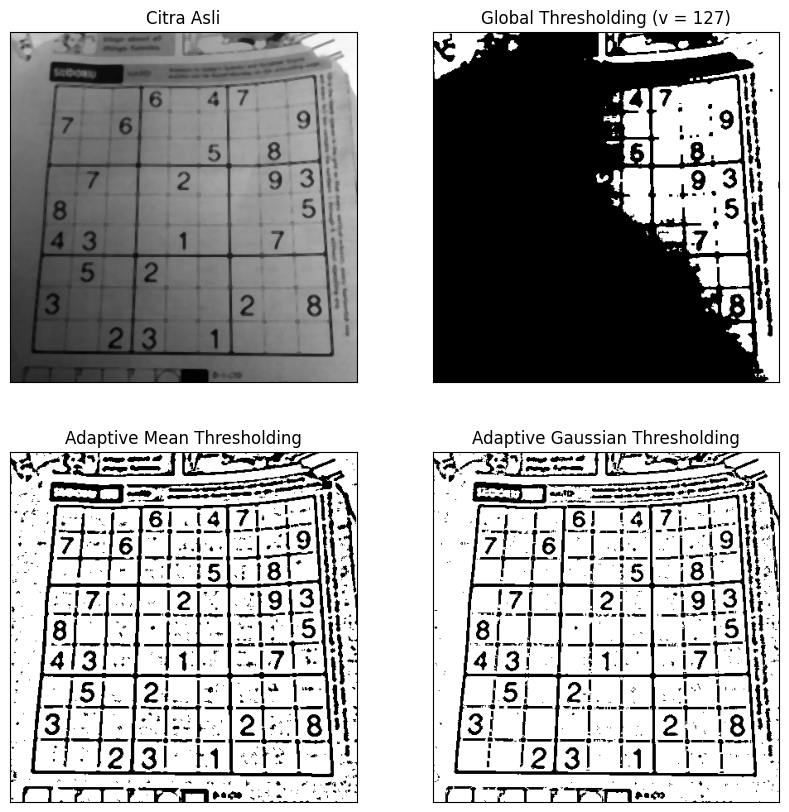

In [108]:
filename = ('/content/drive/MyDrive/PCVK/week10/image_thres/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)

thresh = 127

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)',  'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize = (10,10))
for i in range(len(citra2)):
    plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

 ### **Otsu’s Threshold**

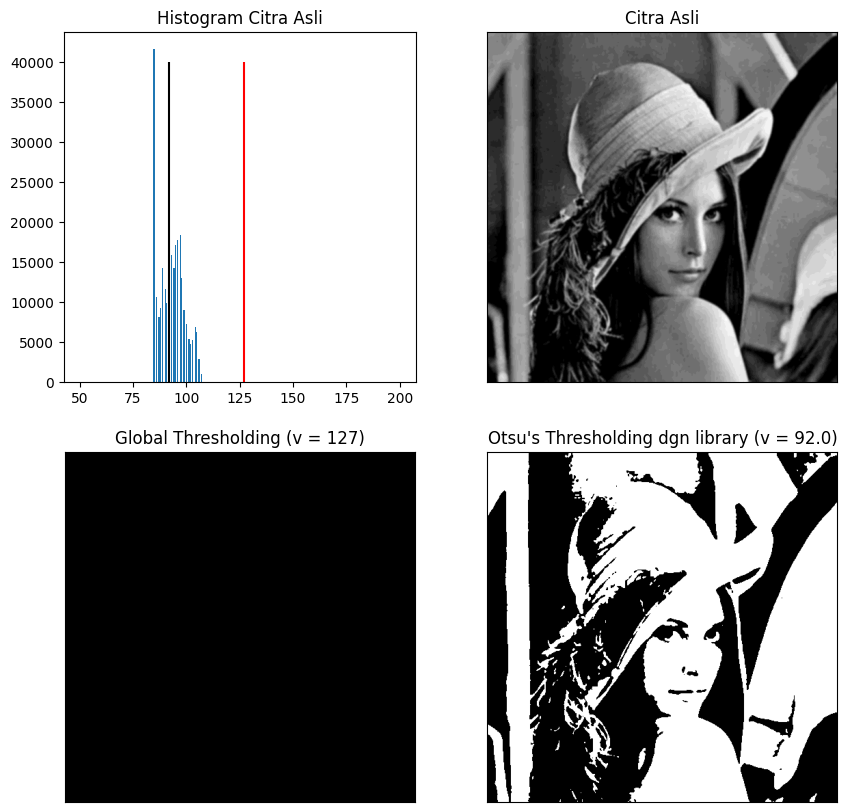

In [109]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/week10/image_thres/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')     #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black')  #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
    plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### **Otsu Threshold dengan Gaussian Filter**

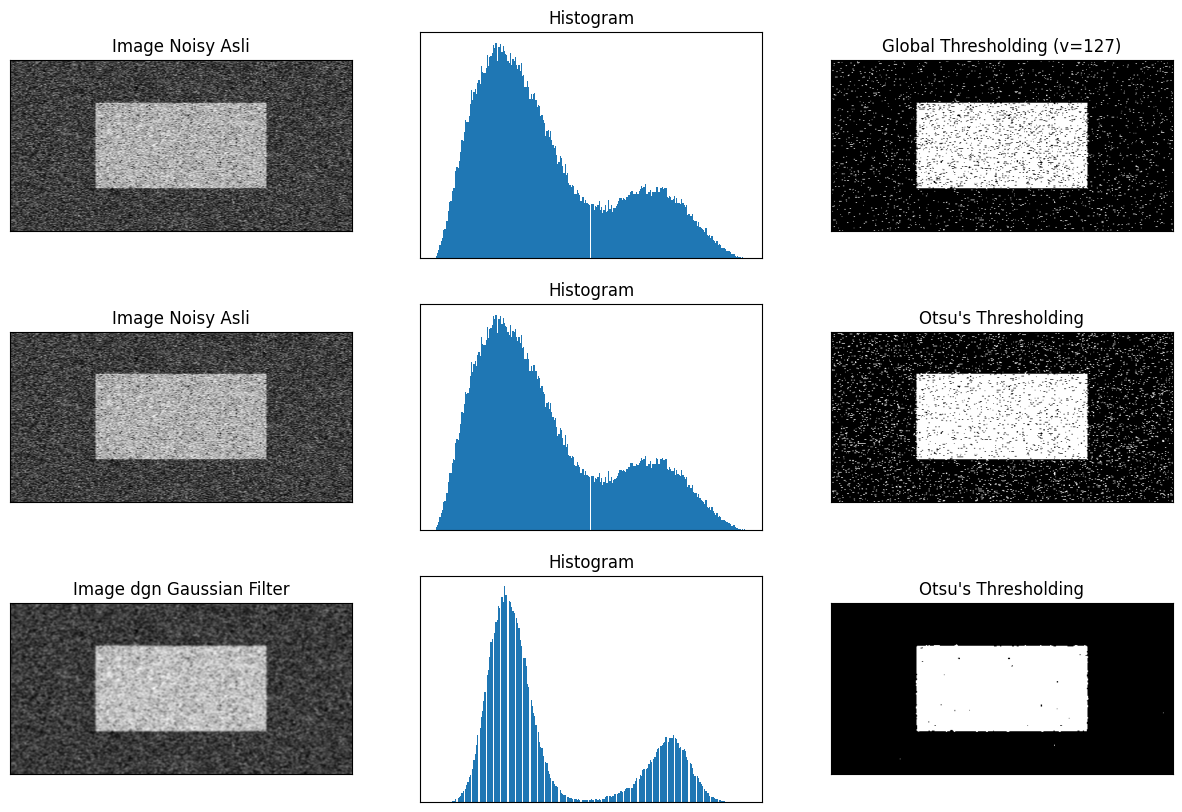

In [110]:
filename = ('/content/drive/MyDrive/PCVK/week10/image_thres/noisy2.png')
img = cv.imread(filename,0)

#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)','Image Noisy Asli','Histogram',"Otsu's Thresholding", 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### **Segmentasi Citra dengan K-Means Clustering**

(<Axes: >, <matplotlib.image.AxesImage at 0x78cfdbf1b3d0>)

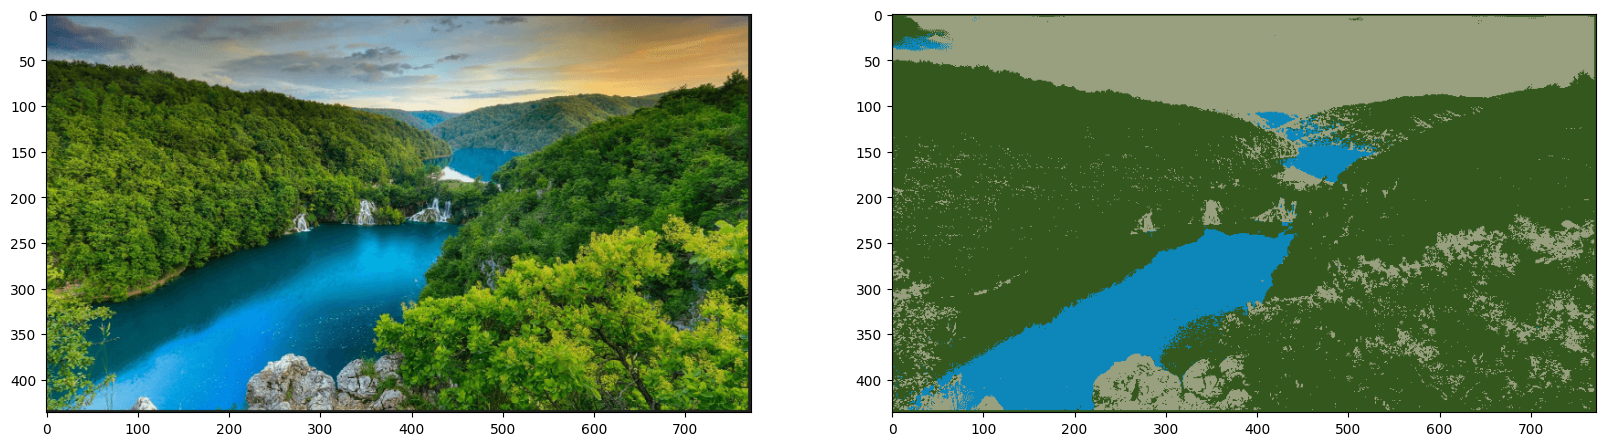

In [111]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/week10/image_thres/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

(<Axes: >, <matplotlib.image.AxesImage at 0x78cfdbb6f1c0>)

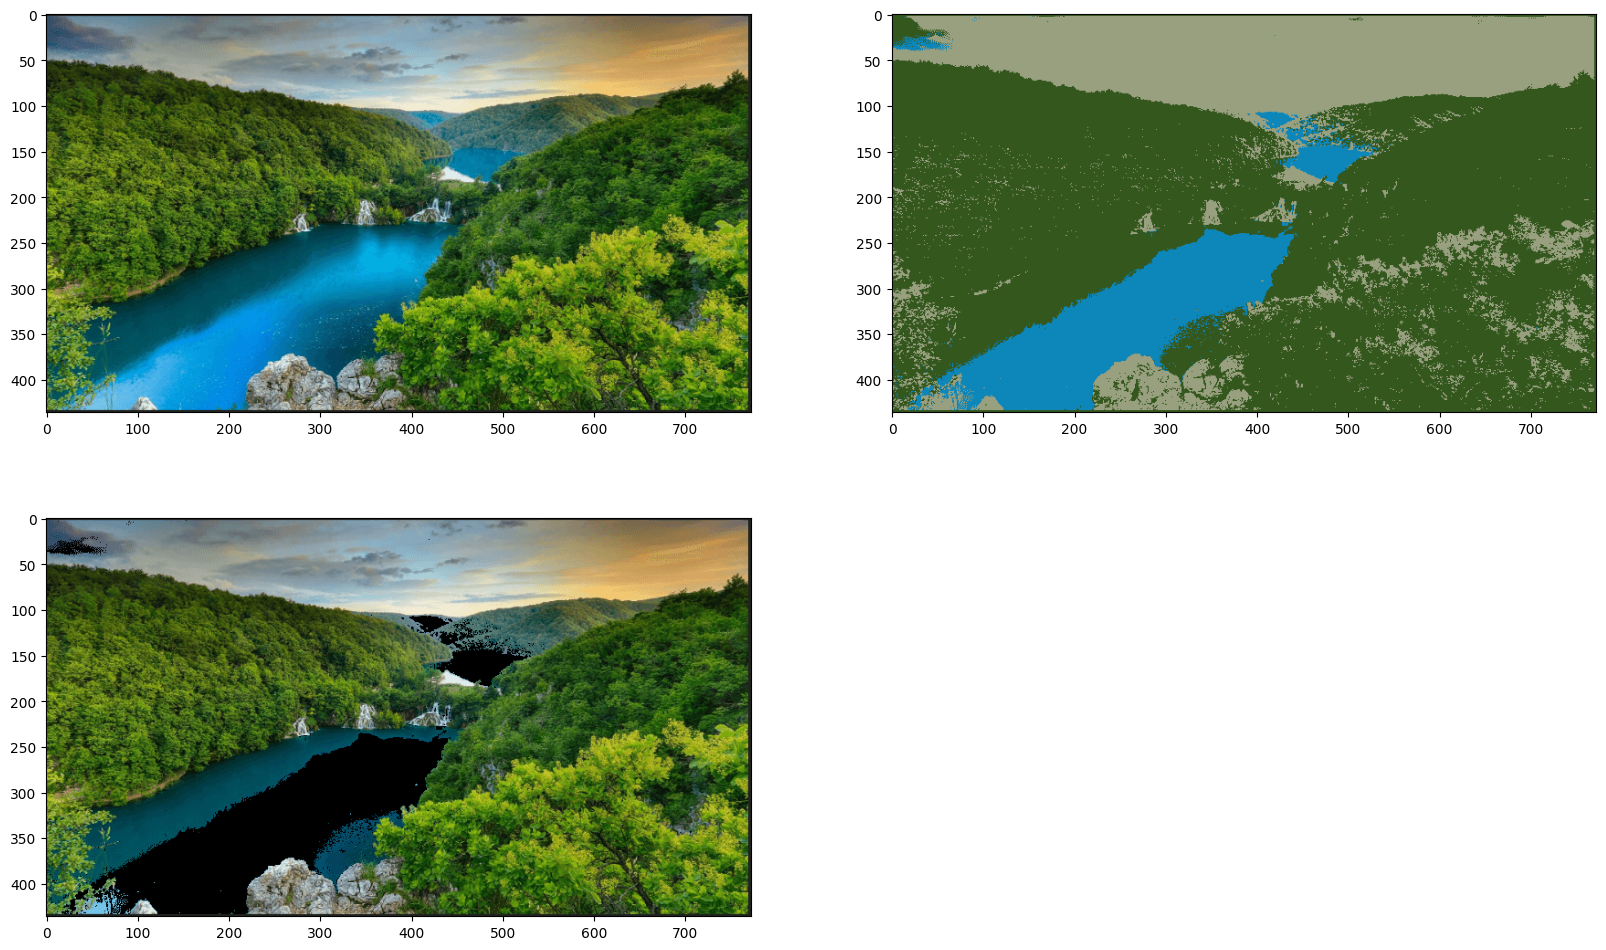

In [112]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)

plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

## **Tugas Praktikum**

**Import Library**

In [128]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

**Membuat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170 secara manua.**

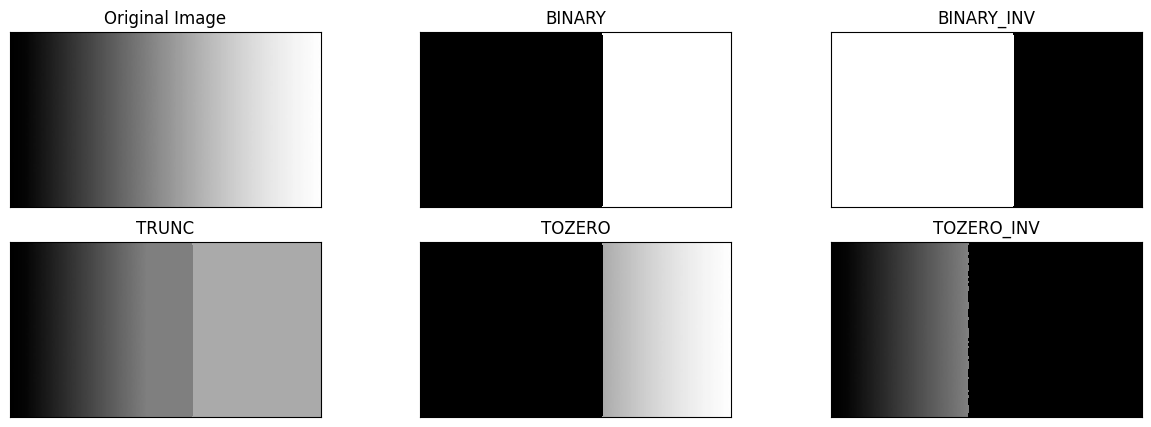

In [130]:
thresh = 170 # nilai Threshold yang ditentukan

# 1. Binary
thresh1[img > thresh] = 255
thresh1[img <= thresh] = 0
# 2. Binary Threshold Inverse
thresh2 = 255 - thresh1
# 3. Threshold Truncate
thresh3[img > thresh] = thresh
# 4. Threshold Tozero
thresh4[img <= thresh] = 0
# 5. Threshold Tozero Inverse
thresh5[img > thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

**Membuat Otsu Thresholding tanpa menggunakan Library. Menampilkan juga nilai threshold saat menggunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)**

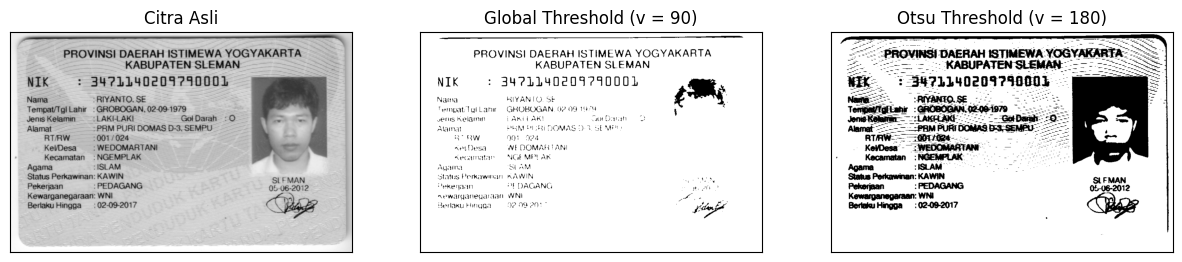

In [131]:
# Baca gambar KTP Riyanto
ktp_img = cv2.imread('/content/drive/MyDrive/PCVK/week10/image_thres/ktp.png', cv2.IMREAD_GRAYSCALE)

# Lakukan Gaussian Blur
ksize = (5, 5)
sigmaX = 0
blur = cv.GaussianBlur(ktp_img, ksize, sigmaX)

# Hitung threshold global
global_threshold = 90
_, th1 = cv.threshold(blur, global_threshold, 255, cv.THRESH_BINARY)

# Hitung threshold Otsu secara manual
hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist /= hist.sum()
variance = np.zeros((256, 1))

for t in range(256):
    q1 = np.sum(hist[:t])
    q2 = np.sum(hist[t:])
    if q1 == 0 or q2 == 0:
        continue
    m1 = np.sum(np.arange(t) * hist[:t]) / q1
    m2 = np.sum(np.arange(t, 256) * hist[t:]) / q2
    variance[t] = q1 * q2 * (m1 - m2) ** 2

ret2 = np.argmin(np.abs(variance - (150 ** 2)))

_, th2 = cv.threshold(blur, ret2, 255, cv.THRESH_BINARY)

x = "Otsu Threshold (v = " + str(ret2) + ")"
titles = ['Citra Asli', 'Global Threshold (v = 90)', x]
citra3 = [blur, th1, th2]

# Tampilkan citra
plt.figure(figsize=(15, 10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh
di bawah dinamakan dengan Citra Segment).

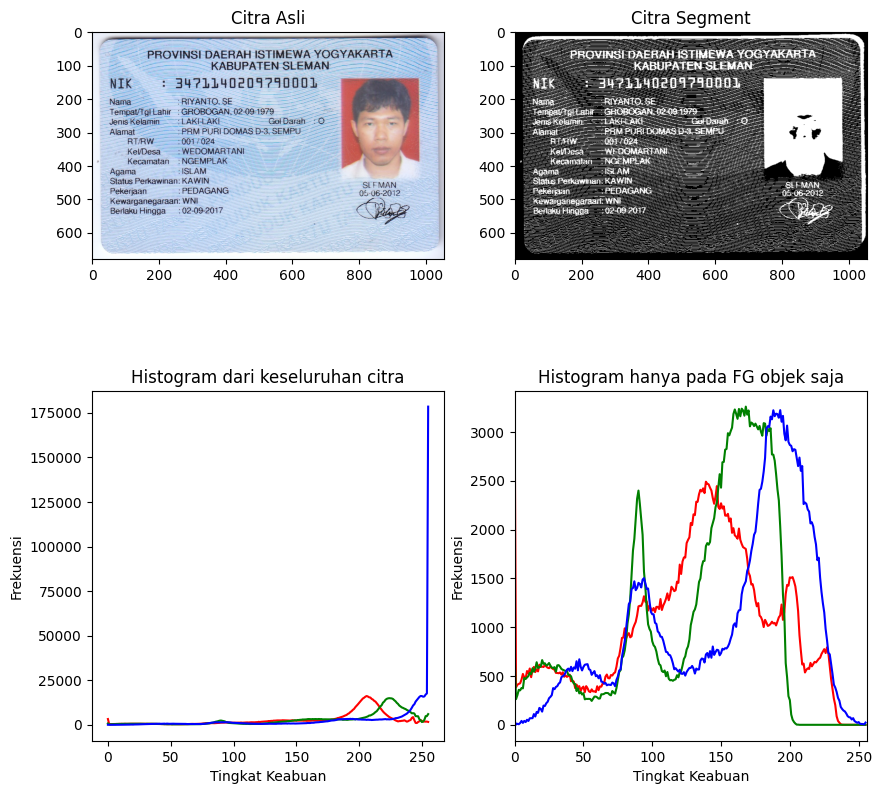

In [132]:
ktp_img_2 = '/content/drive/MyDrive/PCVK/week10/image_thres/ktp.png'
img_rgb = cv2.cvtColor(cv2.imread(ktp_img_2), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

ret3, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r', 'g', 'b')

for i, col in enumerate(color):
    hist_all = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    hist_fg = cv2.calcHist([img_rgb], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 3), plt.plot(hist_all, color=col)
    plt.title('Histogram dari keseluruhan citra')
    plt.xlabel('Tingkat Keabuan')
    plt.ylabel('Frekuensi')
    plt.subplot(2, 2, 4), plt.plot(hist_fg, color=col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlabel('Tingkat Keabuan')
    plt.ylabel('Frekuensi')
    plt.xlim([0, 256])

plt.show()

**Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja).**

(<Axes: >, <matplotlib.image.AxesImage at 0x78cfdb0835e0>)

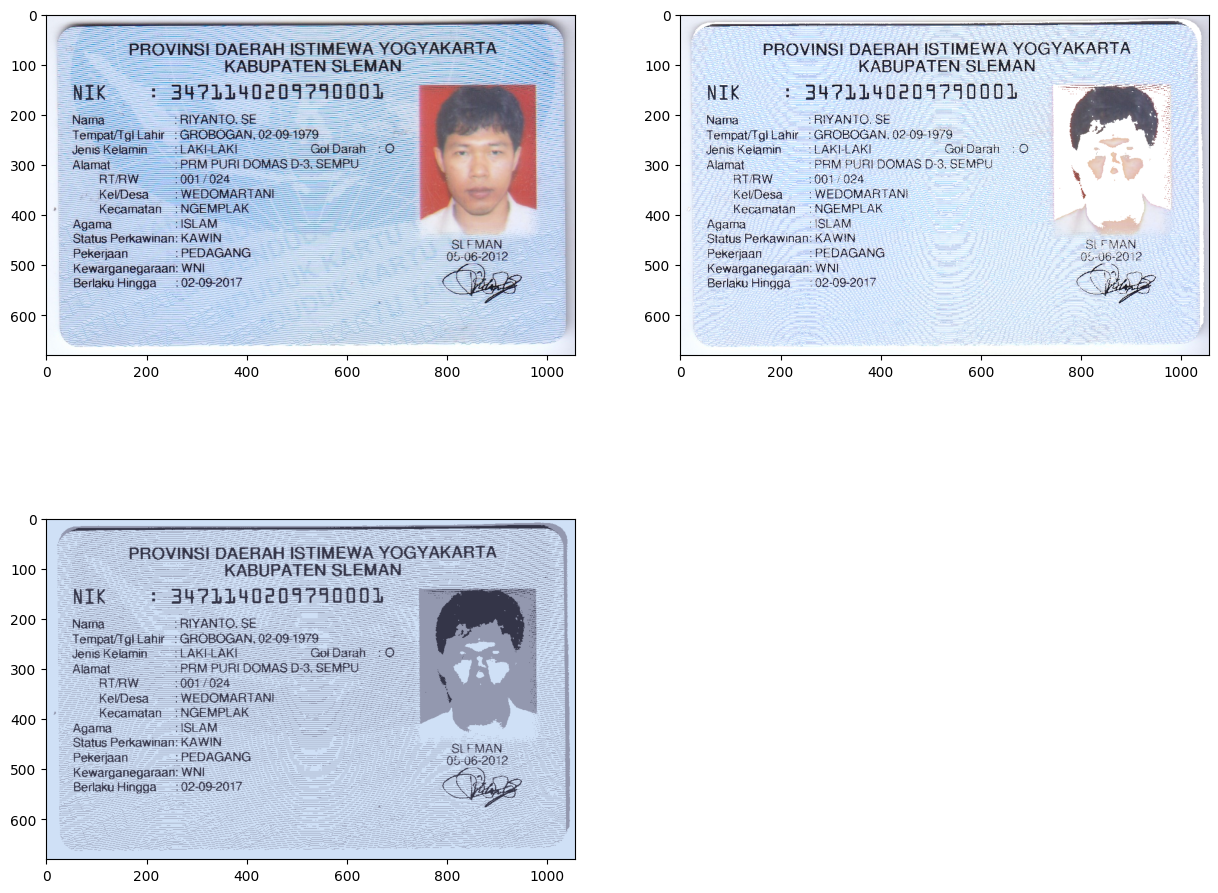

In [133]:
# Mengubah citra ke dalam bentuk array piksel 2D
pixel_values = img_rgb.reshape((-1, 3))

# Mengonversi tipe data piksel menjadi float32
pixel_values = np.float32(pixel_values)

# Menentukan kriteria berhenti untuk algoritma K-Means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Menentukan jumlah kluster (k) untuk K-Means
k = 3
# Melakukan K-Means
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Mengonversi titik pusat (centroids) ke dalam tipe data integer
centers = np.uint8(centers)

# Melakukan flattening pada array label
labels = labels.flatten()

# Membuat citra termasker (masked image) dengan mengubah satu kluster menjadi warna putih (255, 255, 255)
masked_image = np.copy(img_rgb)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2  # Kluster yang akan diubah menjadi warna putih
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img_rgb.shape)

# Mengonversi warna piksel asli ke warna dari setiap centroidnya
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_rgb.shape)

# Menampilkan citra-citra yang telah diproses
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.subplot(2, 2, 3), plt.imshow(segmented_image)

## **Tugas**

**Implementasikan thresholding dengan beberapa metode yang telah diketahui untuk melakukan segmentasi pada dataset KTP.**

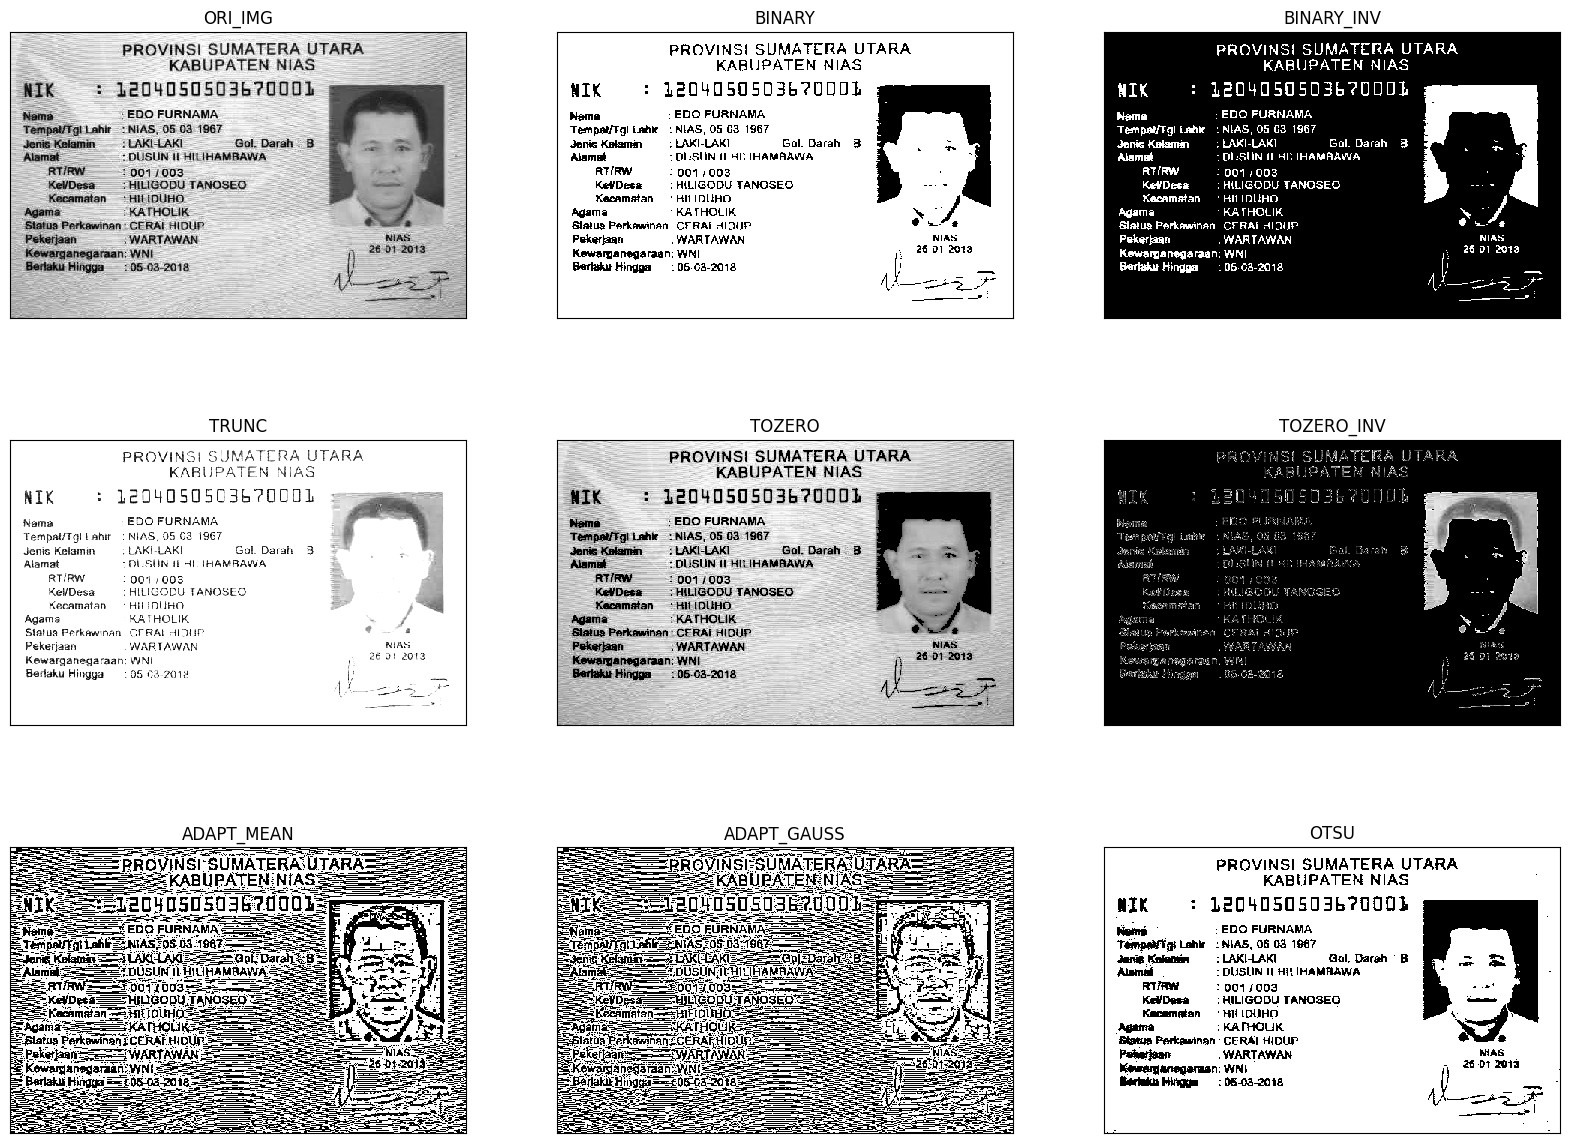

In [167]:
ktp_img = cv.imread('/content/drive/MyDrive/PCVK/ktp/ktp5.png', 0)

thresh = 100 # nilai Threshold yang ditentukan

# 1. Global Threshold
ret,thresh1 = cv.threshold(ktp_img,thresh,255,cv.THRESH_BINARY)
# 2. Binary Inverse Threshold
ret,thresh2 = cv.threshold(ktp_img,thresh,255,cv.THRESH_BINARY_INV)
# 3. Truncate Threshold
ret,thresh3 = cv.threshold(ktp_img,thresh,255,cv.THRESH_TRUNC)
# 4. Tozero Threshold
ret,thresh4 = cv.threshold(ktp_img,thresh,255,cv.THRESH_TOZERO)
# 5. Tozero Inverse Threshold
ret,thresh5 = cv.threshold(ktp_img,thresh,255,cv.THRESH_TOZERO_INV)
# 6. Adaptive Mean Thresholding
thresh6 = cv.adaptiveThreshold(ktp_img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
# 7. Adaptive Gaussian Thresholding
thresh7 = cv.adaptiveThreshold(ktp_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
# 8. Otsu Thresholding
ret2,thresh8 = cv.threshold(ktp_img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

titles = ['ORI_IMG','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','ADAPT_MEAN','ADAPT_GAUSS','OTSU']
images = [ktp_img, thresh1, thresh2, thresh3, thresh4, thresh5, thresh6, thresh7, thresh8]
plt.figure(figsize = (20,15))
for i in range(len(images)):
  plt.subplot(3,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

### **Segmentasi Menggunakan Metode K-Means**

(<Axes: >, <matplotlib.image.AxesImage at 0x78cfdb869810>)

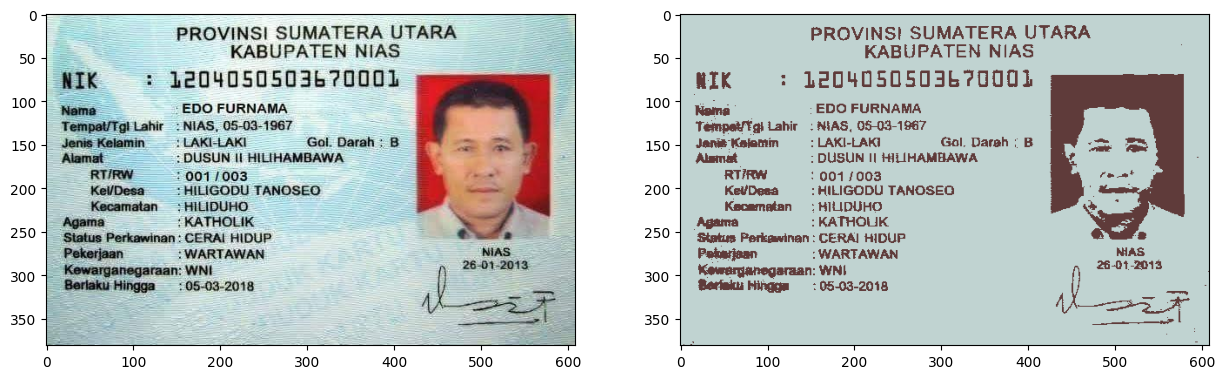

In [168]:
#KMeans Image Segmentation
filename = '/content/drive/MyDrive/PCVK/ktp/ktp5.png'
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

# Mengubah citra ke dalam bentuk array piksel 2D
pixel_values = img.reshape((-1, 3))

# Mengonversi tipe data piksel menjadi float32
pixel_values = np.float32(pixel_values)

# Menentukan kriteria berhenti untuk algoritma K-Means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Menentukan jumlah kluster (k) untuk K-Means
k = 2

# Melakukan K-Means
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Mengonversi titik pusat (centroids) ke dalam tipe data integer
centers = np.uint8(centers)

# Melakukan flattening pada array label
labels = labels.flatten()

# Mengonversi warna piksel asli ke warna dari setiap centroidnya
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

# Menampilkan citra-citra yang telah diproses
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(segmented_image)

### **Ekstraksi Teks dengan Pytesseract**

In [137]:
!pip install pytesseract
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.9 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [170]:
# Ekstraksi teks dari citra yang sudah disegmentasi
extracted_text = pytesseract.image_to_string(segmented_image)

# Tampilkan teks hasil ekstraksi
print("Hasil ekstraksi teks:")
print(extracted_text)

Hasil ekstraksi teks:
 

PROVINS! SUMATERA UTARA
KABUPATEN NIAS

 

WIK 9: 1204050503b70001
Wome EDO FURNAMA
‘Tempetiig) Lahir : NIAS, 05-03-1967
Janis Kaiamin KI-LAKI Gal, Darah ; B
Almerat USUN I HILIHAMBAWA
RFR 001/003
KelDesa =: HILIGODU TANOSEO
Kecamatan  : HILIDUHO
Agama : KATHOUK
‘Status Perkawinan : CERA! HIDUP
:WARTAWAN
Re WNI
7 05-03-2018

 

(26-01-2013
jozz

